## Анализ и прогнозирование временных рядов методами искусственного интеллекта

### **Практическая работа 7. Востановление пропусков и прогноз значений временного ряда.**


#### **7.1 Аналитечкие методы востановления временного ряда**

##### *Краткое описание*

В данном пункте практической работы вам предстоит познакомиться с базовыми, аналитическими методами восстановления временных рядов.
Для выполнения данного пункта из каждой группы методов, представленных в ***табл. 7.1*** вам необходимо выбрать по одному методу восстановления ряда. При работе с первой группой, вам необходимо самостоятельно реализовать выбранный метод.  

**Табл. 7.1** - Группы аналитических методов восстановления.
№|Название группы|Модели и методы|
--|----|----|
1|Заполнение существующими значениями ряда|Средним, медианной, Hot-Deck|
2|Заполнение на основе близки значений|[Интерполяция](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html),  [KNNi](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)|
3|На основе матричных разложений|[CD-Rec](#Fixme:Дат ссылку), [SVD](https://pypi.org/project/fancyimpute/)|

##### 7.1.1 Загрузка и подготовка данных

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path_data = Path('datasets')/'madrid.txt'
madrid = np.loadtxt(path_data)[:,0]
print(madrid.shape)

(25000,)


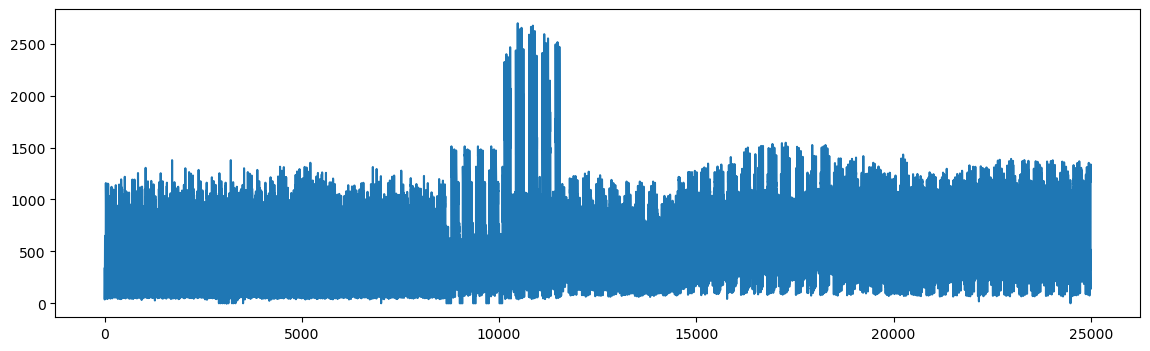

In [4]:
fig, ax =  plt.subplots(figsize=(14,4),ncols=1,nrows=1)
plt.plot(madrid[:])
plt.show()

Самостоятельно реализуйте функцию, принимающую на вход многомерный временной ряд и возвращающий:
1. Все подпоследовательности временного ряда, в которых некоторые значения временного ряда были заменены nan значениями.
2. Индексы пропущенных значений
   
Процент пропущенных значений должен регулироваться отдельным параметром.


In [6]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 MB 5.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 4.4 MB/s eta 0:00:00a 0:00:01
    pytz (>dev)
         ~^
  Attempting uninstall: sympy
    Found existing installation: sympy 1.12
    Uninstalling sympy-1.12:
      Successfully uninstalled sympy-1.12
Note: you may need to restart the kernel to use updated packages.


In [7]:
import copy
import torch
import random

def add_nan(x, percent = 0.25):
    x_nan = copy.deepcopy(x)
    nan_len = x.shape[0] * percent
    nan_counter = 0

    for i in range(x_nan.shape[0]):
        if nan_counter <= nan_len and random.randint(0, 1):
            x_nan[i] = np.nan
            nan_counter += 1

    return x_nan, np.isnan(x_nan)

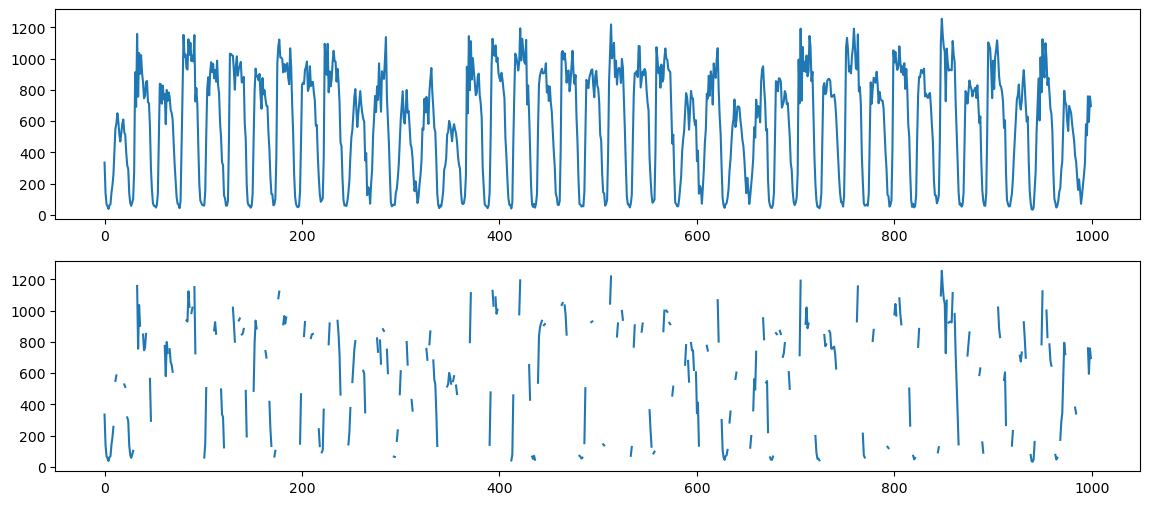

In [8]:
madrid_with_nan, index = add_nan(madrid)
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_with_nan[:1000])
plt.show()

In [9]:
recovery = {}

##### 7.1.2 Заполнение существующими значениями ряда


In [10]:
madrid_mean = madrid_with_nan.copy()
madrid_mean[index] = np.nanmean(madrid_mean)
recovery['mean'] = madrid_mean

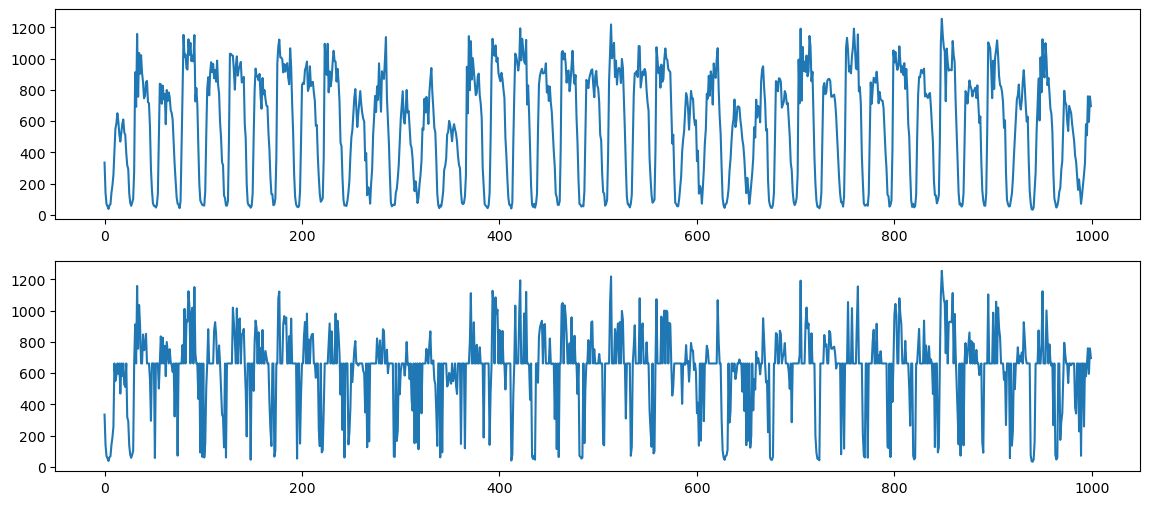

In [11]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_mean[:1000])
plt.show()

In [12]:
madrid_median = madrid_with_nan.copy()
madrid_median[index] = np.nanmedian(madrid_median)

In [13]:
recovery['median'] = madrid_median

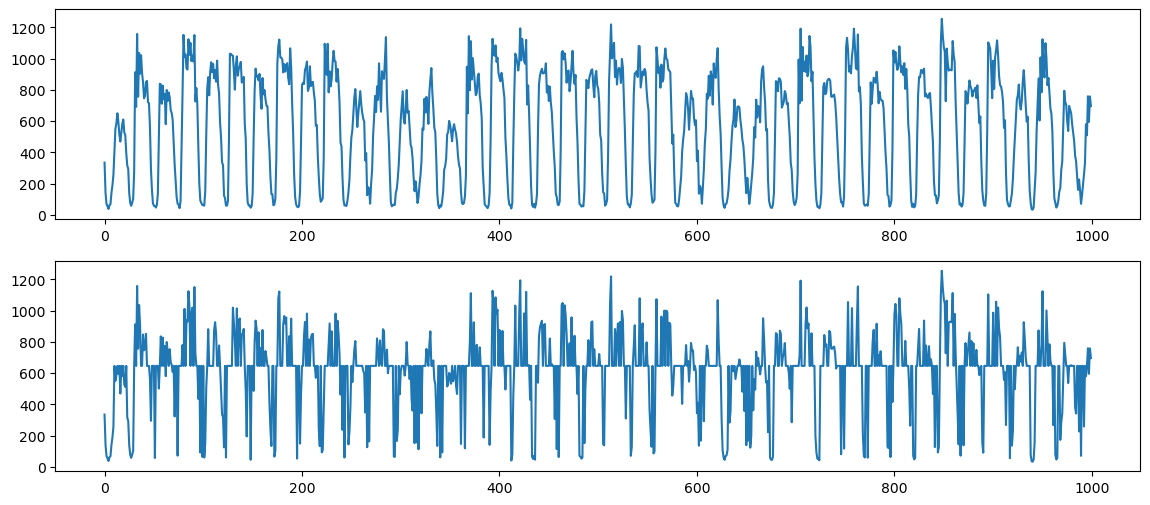

In [14]:
#madrid_with_nan, index = add_nan(madrid)
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_median[:1000])
plt.show()

Самостоятельно реализуйте один метод из первой группы ***табл. 7.1*** и проведите постановление данных, сохранив результаты восстановления.

##### 7.1.3 Заполнение на основе близких значений


Используя документацию одного из методов восстановления второй группы ***табл. 7.1*** и проведите восстановление данных, сохранив результаты восстановления.

In [15]:
from sklearn.impute import KNNImputer

In [16]:
def rolling_window(a, window, intersection=False):
    # result = torch.zeros(size=(a.shape[0],a.shape[1]))
    returns = []
    if intersection:  
        for i in range(0, a.shape[0]-window):
            returns.append(a[i:i + window])
    else:    
        for i in range(0, a.shape[0],window):
            returns.append(a[i:i + window])
    return np.stack(returns)

In [17]:
madrid_with_nan, index = add_nan(madrid)

madrid_slice = rolling_window(madrid_with_nan, 100)

imputer = KNNImputer(n_neighbors=10)

madrid_knn_imputer = imputer.fit_transform(madrid_slice)
madrid_knn_imputer = madrid_knn_imputer.ravel()

In [18]:
recovery['knn_imputer'] = madrid_knn_imputer

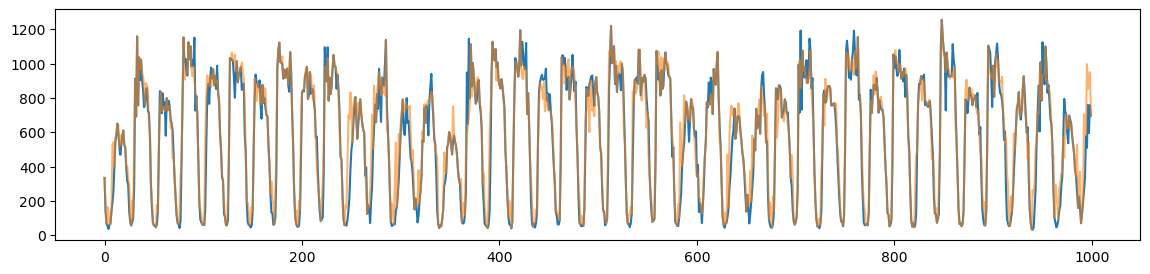

In [19]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)
ax.plot(madrid[:1000])
ax.plot(madrid_knn_imputer[:1000], alpha=0.6)
plt.show()

##### 7.1.4 Заполнение на матричных преобразований

Используя документацию одного из методов восстановления третей группы ***табл. 7.1*** и проведите восстановление данных, сохранив результаты восстановления.

In [20]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 4.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.4 MB/s eta 0:00:00-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.7 MB/s eta 0:00:00a 0:00:01
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=bd6189b6485068839e6f53a7bf2210ce1f293c54b46212e12329e110f9a395b4
  Stored in directory: /Users/mikhailmedvedev/Library/Caches/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11331 sha256=d2ce7a92b4479d1228b459c7fcba4d7197dc7253b58a0f5549a9bd43b8b593aa
  Stored in directory: /Users/mikhailmedvedev/Library/Caches/pip/wheels/46/06/a5

In [21]:
from fancyimpute import IterativeSVD

In [22]:
solver = IterativeSVD(rank=2)
madrid_iterative_svd = madrid_slice.copy()
madrid_iterative_svd = solver.fit_transform(madrid_iterative_svd)
madrid_iterative_svd = madrid_iterative_svd.ravel()

[IterativeSVD] Iter 1: observed MAE=343.978114
[IterativeSVD] Iter 2: observed MAE=269.194835
[IterativeSVD] Iter 3: observed MAE=259.317683
[IterativeSVD] Iter 4: observed MAE=256.509232
[IterativeSVD] Iter 5: observed MAE=255.619073
[IterativeSVD] Iter 6: observed MAE=255.341047
[IterativeSVD] Iter 7: observed MAE=255.253878
[IterativeSVD] Iter 8: observed MAE=255.234965
[IterativeSVD] Iter 9: observed MAE=255.233001
[IterativeSVD] Iter 10: observed MAE=255.237468
[IterativeSVD] Iter 11: observed MAE=255.244450


In [43]:
from sklearn.metrics import mean_squared_error

##### 7.1.5 Сравнение результатов восстановления.

Для каждой группы методов постройте методов основные метрики оценки качества постановления.
На основе метрик отберите лучшие методы постановления метрик и выберите лучшую группу методов.
Для лучших методов из каждой группы постройте графики сравнения реальных и восстановленных данных. Объясните результаты и сделайте вывод.



*Вывод*:

#### **7.2 Нейросетевые методы востановления временного ряда**

##### *Краткое описание*

В данном пункте практической работы вам предстоит познакомиться с некоторыми нейросетевыми методами восстановления временных рядов.
Для выполнения данного пункта вам предстоит самостоятельно реализовать структуру нейросетевой, модели основанной на GRU нейронах и сравнить ее с другими нейросетевыми методами восстановления При сравнении с 3 группой из **табл.7. 2** вам необходимо выбрать **один** метод восстановления. Основные блоки обработки данных будут реализованы с использованием Pytorch. Вам не запрещается использовать для реализации Keras.

**табл. 7.2** - Нейросетевые методы восстановления.
№|Название группы|Модели и методы|
--|-------------|----|
1|Линейные нейроны|[Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)|
 2eкрркуретные нейронны|[Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.GRU.html)|
3|Сложные структуры|[SAITS, BRITS, M-RNN](https://github.com/WenjieDu/PyPOTS)|

In [21]:
recovery_nn = {}

##### 7.2.1 Загрузка и подготовка данных

In [24]:
path_data = Path('datasets')/'madrid.txt'
madrid = np.loadtxt(path_data)[:,:]
print(madrid.shape)

(25000, 10)


In [25]:
madrid_with_nan, index = add_nan(madrid, 0.25)

In [26]:
madrid_with_nan.shape

(25000, 10)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
madrid_normal_with_nan = scaler.fit_transform(madrid_with_nan)
rolling_madrid = rolling_window(madrid_normal_with_nan, 100, True)
train, test = train_test_split(rolling_madrid,shuffle=False, test_size=0.33)

##### 7.2.2 Базовая модель восстановления данных, построенная на нескольких слоях линейных нейронов.


Вам необходимо будет самостоятельно реализовать:
1. инициализацию nan значений какими либо другими значениями.
2. замер времени полного обучения и тестирования модели.

In [28]:
import torch
from torch import nn
from torch.utils.data import DataLoader

In [29]:
class LinearModel(nn.Module):
    def __init__(self, size_subsequent: int,dim = 1, nums_layers = 3, size_layers = 250):
        super().__init__()  
        
        self.size_subsequent = size_subsequent
        self.nums_layers = nums_layers*dim
        self.dim = dim
        self.size_layers = size_layers
        
        self.start_layers = nn.Sequential(nn.Flatten(),
                                          nn.Linear(size_subsequent*dim, self.size_layers),
                                          nn.LeakyReLU())
        self.model = nn.ModuleList([
                                        (nn.Sequential(
                                                nn.Linear(self.size_layers, self.size_layers), nn.LeakyReLU()
                                            ) 
                                        )
                                    for x in torch.arange(nums_layers)])
        self.model = nn.Sequential(*self.model)
        
        self.output = nn.Sequential(nn.Linear(self.size_layers,size_subsequent*dim),nn.Tanh())
        
    def forward(self, x):
        x = self.start_layers(x)
        
        x=self.model(x)
        x=self.output(x)
        return x.reshape(x.shape[0],self.size_subsequent,self.dim)

In [30]:
model = LinearModel(size_subsequent=train.shape[1],dim=train.shape[2])
optimizer = torch.optim.Adam(model.parameters(),lr=1.0e-3)
loss_func = nn.MSELoss()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
batch_size = 64
percent = 0.25

train_loader = DataLoader(train,batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(test,batch_size=batch_size,shuffle=True)

print(train.shape,test.shape)
epochs = 100

(16683, 100, 10) (8217, 100, 10)


In [31]:
model

LinearModel(
  (start_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1000, out_features=250, bias=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (model): Sequential(
    (0): Sequential(
      (0): Linear(in_features=250, out_features=250, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Linear(in_features=250, out_features=250, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Linear(in_features=250, out_features=250, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
    )
  )
  (output): Sequential(
    (0): Linear(in_features=250, out_features=1000, bias=True)
    (1): Tanh()
  )
)

In [32]:
import time
times_model = {}

In [33]:
model=model.to(device)
train_history = []
valid_history = []

start = time.time()
for epoch in np.arange(epochs):
    train_loss =0
    valid_loss =0

    for i, x in enumerate(train_loader):
        if x.shape[0] == batch_size:
            optimizer.zero_grad()
            x = x.to(device).to(torch.float32)
            test_index = np.isnan(x.cpu().numpy())
            X = x.clone()
            X, nan = add_nan(X,percent)
            X[torch.isnan(X)] = 0.0  # Инициализация пропущенных значений нулями
            recovery = model(X)
            loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
            train_loss += loss.detach().cpu().item()
            loss.backward()
            optimizer.step()
    train_loss/=(i+1)
    print('valid')
    with torch.no_grad():
        for i, x in enumerate(valid_loader):
            if x.shape[0] == batch_size:
                x = x.to(device).to(torch.float32)
                test_index = np.isnan(x.cpu().numpy())
                X = x.clone()
                X, nan = add_nan(X,percent)
                X[torch.isnan(X)]=0.0
                recovery = model(X)
                loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
                valid_loss += loss.detach().cpu().item()
    valid_loss/=(i+1)
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'epoch:{epoch+1} train:{train_loss}, valid:{valid_loss}')
end = time.time()

/var/folders/d_/m9h_bd6161x8tltvkzyg86740000gn/T/ipykernel_3837/262026474.py:19: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/IndexingUtils.h:28.)
  loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
/opt/anaconda3/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/IndexingUtils.h:28.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


valid
epoch:1 train:0.03461162277793519, valid:0.03441709623664849


/var/folders/d_/m9h_bd6161x8tltvkzyg86740000gn/T/ipykernel_3837/262026474.py:34: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/IndexingUtils.h:28.)
  loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])


valid
epoch:2 train:0.03223414005447622, valid:0.033139917681845585
valid
epoch:3 train:0.03267117519773743, valid:0.03355105722308621
valid
epoch:4 train:0.03271388092659899, valid:0.03312648070413013
valid
epoch:5 train:0.03282708461285779, valid:0.03512584328535916
valid
epoch:6 train:0.0323713321124571, valid:0.03367566165709218
valid
epoch:7 train:0.032873578954816324, valid:0.03393802549256835
valid
epoch:8 train:0.032568314644397446, valid:0.03407460868416368
valid
epoch:9 train:0.03271517271026113, valid:0.03357830848689227
valid
epoch:10 train:0.0322663783670271, valid:0.035059046361219974
valid
epoch:11 train:0.03258307712059825, valid:0.033947309089261433
valid
epoch:12 train:0.032512098522250225, valid:0.03438278094165085
valid
epoch:13 train:0.032590651584939026, valid:0.0335477076095435
valid
epoch:14 train:0.03242322304410953, valid:0.0336977125744718
valid
epoch:15 train:0.0325485167318377, valid:0.03429725018236064
valid
epoch:16 train:0.03240760218823093, valid:0.0340

In [34]:
times_model['linear']=end-start

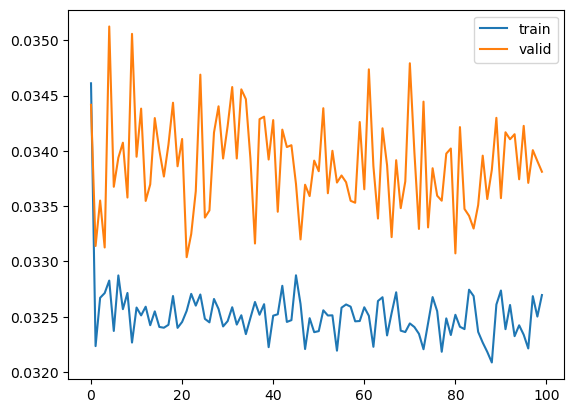

In [35]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()

In [36]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
#test = []
with torch.no_grad():
    for idx, batch in enumerate(test_rolling_madrid):
        batch = torch.Tensor(batch).to(device)
        nan = torch.isnan(batch)
        batch[nan]=0.0
        rec = model(batch[None,:])[0].cpu().numpy()
        nan = nan.cpu().numpy()
        test_rolling_madrid[idx][nan]=rec[nan]

In [37]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_linear = scaler.inverse_transform(test_madrid_normal)

In [40]:
recovery_nn = {}

In [41]:
recovery_nn['linear'] = test_linear

6040203.299153216


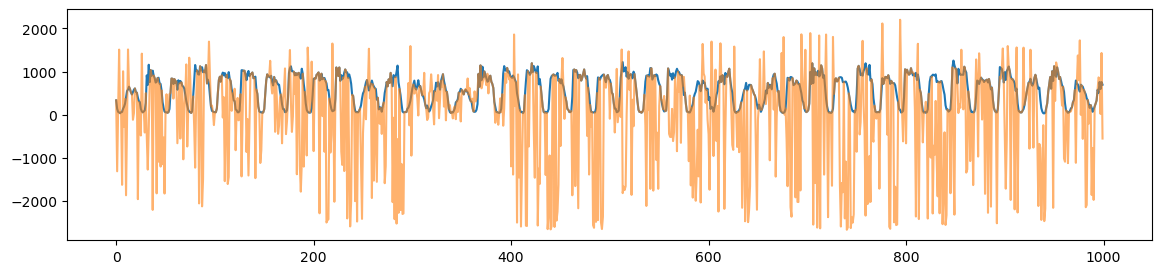

In [44]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_linear[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_linear[index].reshape(1,-1)))

##### 7.2.3 Реккурентная модель востановлениях данных


In [45]:
class EncoderGRU(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.size_subsequent=size_subsequent
        self.dim = dim
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size=dim,
                          hidden_size=self.hidden_size)
        
        self.latten = nn.Linear(hidden_size*size_subsequent,latten_size)
        self.leaky = nn.LeakyReLU()
        self.fl = nn.Flatten()
    def forward(self, x):
        x, _ = self.gru(x)
        x = self.leaky(x)
        #print(x.shape)
        x = self.fl(x)
        x = self.latten(x)
        return self.leaky(x)
        

In [46]:
class DecoderGRU(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.size_subsequent=size_subsequent
        self.dim = dim
        self.hidden_size = hidden_size
        self.latten_size=latten_size
        self.gru = nn.GRU(input_size=self.hidden_size,
                          hidden_size=dim)
        self.latten = nn.Linear(latten_size,hidden_size*size_subsequent)
        self.leaky = nn.LeakyReLU()
    
    def forward(self, x):
        x = self.latten(x)
        x = x.view(-1, self.size_subsequent, self.latten_size)
        x = self.leaky(x)
        x, _ = self.gru(x)
        return self.leaky(x)
        

In [47]:
class TimeAE(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.encoder = EncoderGRU(size_subsequent=size_subsequent,
                                 dim=dim,
                                 latten_size=latten_size,
                                 hidden_size=hidden_size) 
        self.decoder = DecoderGRU(size_subsequent=size_subsequent,
                                 dim=dim,
                                 latten_size=latten_size,
                                 hidden_size=hidden_size) 
    def forward(self, x):
        x=self.encoder(x)
        x = self.decoder(x)
        return x

In [48]:
model = TimeAE(size_subsequent=train.shape[1],dim=train.shape[2])
optimizer = torch.optim.Adam(model.parameters(),lr=1.0e-3)
loss_func = nn.MSELoss()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
batch_size = 64
percent = 0.25

train_loader = DataLoader(train,batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(test,batch_size=batch_size,shuffle=True)


epochs = 100

In [49]:
model

TimeAE(
  (encoder): EncoderGRU(
    (gru): GRU(10, 100)
    (latten): Linear(in_features=10000, out_features=100, bias=True)
    (leaky): LeakyReLU(negative_slope=0.01)
    (fl): Flatten(start_dim=1, end_dim=-1)
  )
  (decoder): DecoderGRU(
    (gru): GRU(100, 10)
    (latten): Linear(in_features=100, out_features=10000, bias=True)
    (leaky): LeakyReLU(negative_slope=0.01)
  )
)

In [51]:
model=model.to(device)
train_history = []
valid_history = []
start = time.time()
for epoch in np.arange(epochs):
    train_loss =0
    valid_loss =0

    for i, x in enumerate(train_loader):
        if x.shape[0]==batch_size:
            optimizer.zero_grad()
            x = x.to(device).to(torch.float32)
            test_index = np.isnan(x.cpu().numpy())
            X = x.clone()
            X, nan = add_nan(X,percent)
            X[torch.isnan(X)] = 0.0  # Инициализация пропущенных значений нулями
            
            recovery = model(X)
            loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
            train_loss += loss.detach().cpu().item()
            loss.backward()
            optimizer.step()
    train_loss/=(i+1)
    with torch.no_grad():
        for i, x in enumerate(valid_loader):
            if x.shape[0]==batch_size:
                x = x.to(device).to(torch.float32)
                test_index = np.isnan(x.cpu().numpy())
                X = x.clone()
                X, nan = add_nan(X,percent)
                X[torch.isnan(X)] = 0.0  # Инициализация пропущенных значений нулями
                
                recovery = model(X)
                loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
                valid_loss += loss.detach().cpu().item()
    valid_loss/=(i+1)
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'epoch:{epoch+1} train:{train_loss}, valid:{valid_loss}')
end = time.time()

/var/folders/d_/m9h_bd6161x8tltvkzyg86740000gn/T/ipykernel_3837/3140299745.py:19: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/IndexingUtils.h:28.)
  loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
/var/folders/d_/m9h_bd6161x8tltvkzyg86740000gn/T/ipykernel_3837/3140299745.py:34: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/IndexingUtils.h:28.)
  loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])


epoch:1 train:0.03272986162268339, valid:0.03429054647915123
epoch:2 train:0.03263004785011098, valid:0.03361651559844035
epoch:3 train:0.03248748406625114, valid:0.0332513597844414
epoch:4 train:0.03272180947193241, valid:0.03335452313686526
epoch:5 train:0.03209685713366759, valid:0.03412823646163293
epoch:6 train:0.03255539484521895, valid:0.03519579633897127
epoch:7 train:0.03265315676785977, valid:0.03425735430142214
epoch:8 train:0.03245924732922594, valid:0.03332607157874939
epoch:9 train:0.03233677541330399, valid:0.032967715675747675
epoch:10 train:0.03242675534724276, valid:0.033785314479655076
epoch:11 train:0.03250351184943398, valid:0.03455614341899406
epoch:12 train:0.03240634665835178, valid:0.03331616883303306
epoch:13 train:0.032120861020296015, valid:0.0338715639456298
epoch:14 train:0.032233770487123524, valid:0.03391163469862568
epoch:15 train:0.03284006353853078, valid:0.03394696877388529
epoch:16 train:0.032447543352043036, valid:0.03383402561032495
epoch:17 train

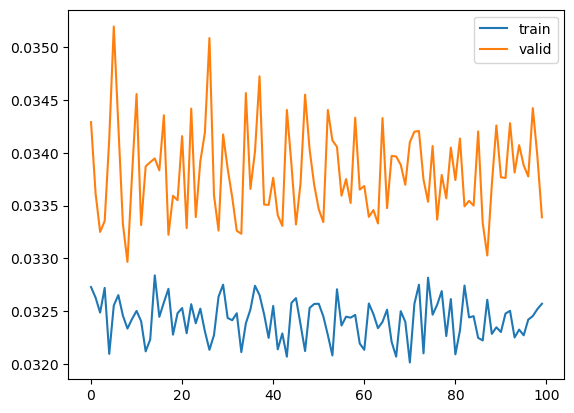

In [52]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()

In [53]:
times_model['ae']=end-start

In [54]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
with torch.no_grad():
    for idx, batch in enumerate(test_rolling_madrid):
        batch = torch.Tensor(batch).to(device)
        nan = torch.isnan(batch)
        batch[nan]=0.0
        
        rec = model(batch[None,:])[0].cpu().numpy()
        nan = nan.cpu().numpy()
        test_rolling_madrid[idx][nan]=rec[nan]

In [55]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_ae = scaler.inverse_transform(test_madrid_normal)

In [56]:
recovery_nn['test_ae'] = test_ae

151065.3362719804


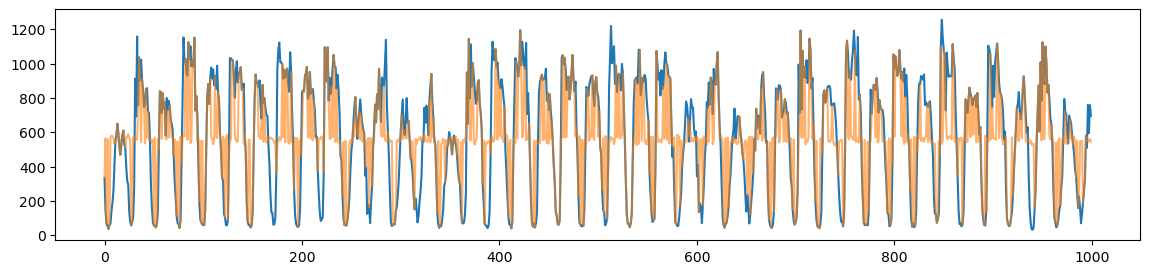

In [57]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_ae[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_ae[index].reshape(1,-1)))

##### 7.2.4 Сложные модели нейросетевого восстановления данных


Вам необходимо выбрать одну модель из 3 группы таблицы 7.2 и используя документацию произвести восстановления того же ряда. Произведите замер времени.

In [58]:
!pip install pypots==0.0.9

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 6.8 MB/s eta 0:00:00a 0:00:01
    pytz (>dev)
         ~^


In [59]:
from pypots.imputation import SAITS

In [62]:
model= SAITS(n_features=madrid.shape[1],
             n_steps=100,
             device=device,
             d_k=64,
             d_v=64,
             d_model=128,
             d_inner=128,
             n_head=4,
             n_layers=2,
             dropout=0.05,
             epochs=2)

Model initialized successfully. Number of the trainable parameters: 667608


In [63]:
start = time.time()
model.fit(train,test)
end = time.time()
times_model['saits']=end-start

epoch 0: training loss 0.1746, validating loss 0.0491
epoch 1: training loss 0.1095, validating loss 0.0387
Finished training.


In [64]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
test_rolling_madrid = model.impute(test_rolling_madrid)

In [65]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_saits = scaler.inverse_transform(test_madrid_normal)

In [66]:
recovery_nn['saits'] = test_saits

118883.19243088014


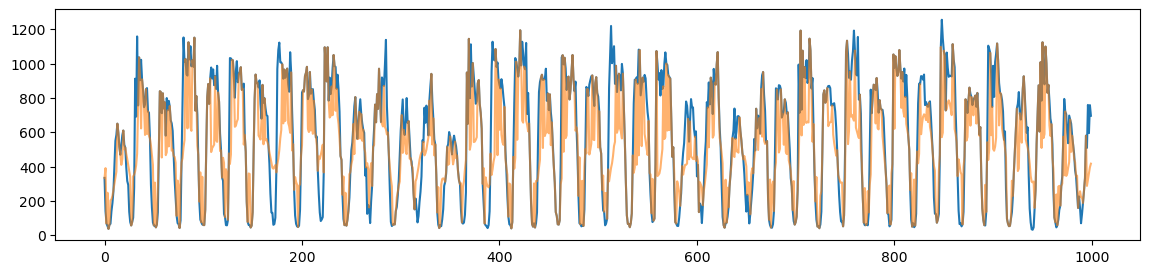

In [67]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_saits[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_saits[index].reshape(1,-1)))

##### 7.2.5 Сравнения результатов.
Также, как и в пункте 7.1.5 постройте графики сравнения моделей. Дополнительно постройте графики сравнения времени. Сделайте выводы

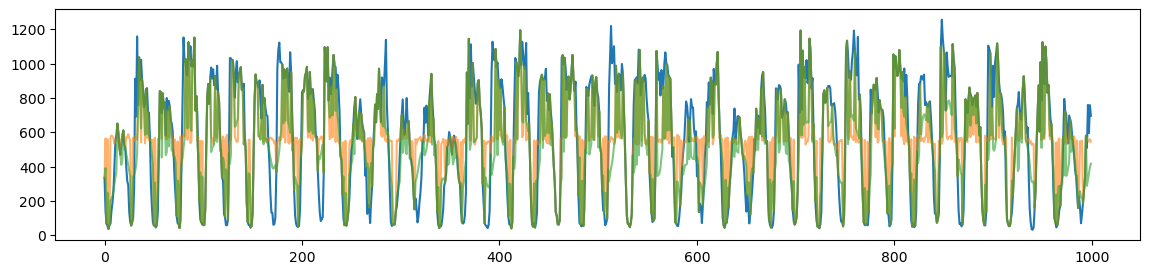

In [76]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
#plt.plot(test_linear[:1000,0],alpha=0.6)
plt.plot(test_ae[:1000,0],alpha=0.6)
plt.plot(test_saits[:1000,0],alpha=0.6)

In [80]:
times_model['linear']

56.8533890247345

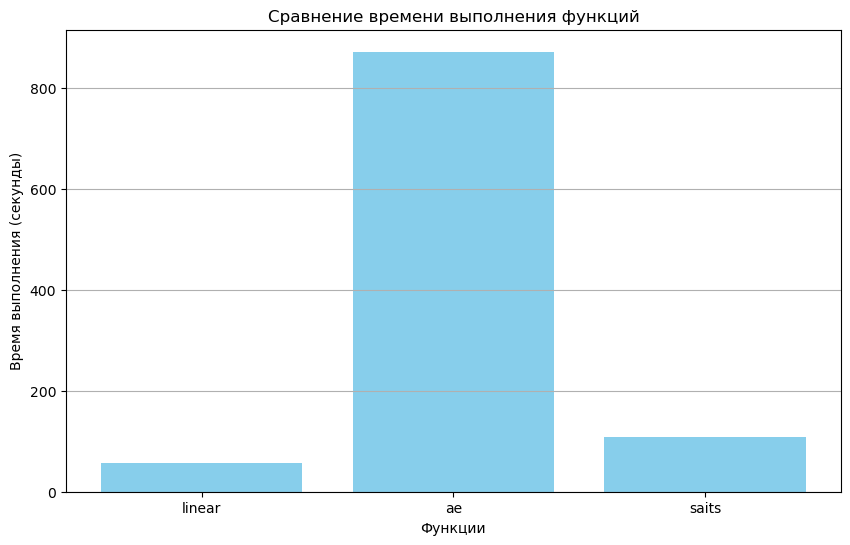

In [81]:
labels = list(times_model.keys())
times = list(times_model.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color='skyblue')
plt.xlabel('Функции')
plt.ylabel('Время выполнения (секунды)')
plt.title('Сравнение времени выполнения функций')
plt.grid(axis='y')

plt.show()

#### **7.3 Прогноз временного ряда**

##### *Краткое описание*

Используя модель и [ARIMA](реализация) произвидите прогноз ряда на следующие колличество точек: 1, 5, 10.
Сравните результаты. Постройте графики прогноза и точности прогноза.